In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 
from glob import glob 

from sklearn.model_selection import train_test_split 
from sklearn import metrics 

import cv2 
import gc 
import os 

import tensorflow as tf 
from tensorflow import keras 
from keras import layers 

import warnings 
warnings.filterwarnings('ignore')

In [4]:
from zipfile import ZipFile 
data_path = 'archive.zip'

with ZipFile(data_path,'r') as zip: 
     zip.extractall() 
     print('The data set has been extracted.')


The data set has been extracted.


In [8]:
path = r"D:\DATA SETS\archive\lung_colon_image_set\lung_image_sets"
classes = os.listdir(path) 
classes

['lung_aca', 'lung_n', 'lung_scc']

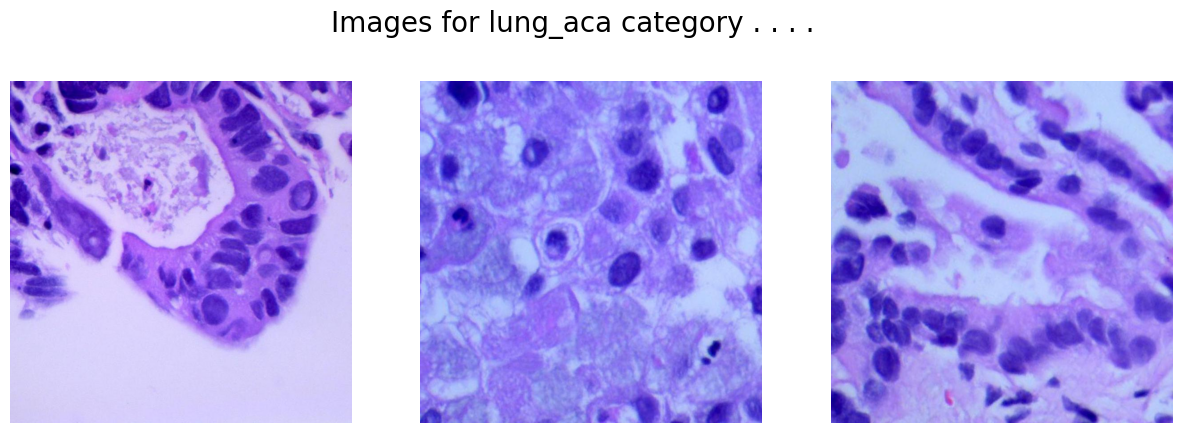

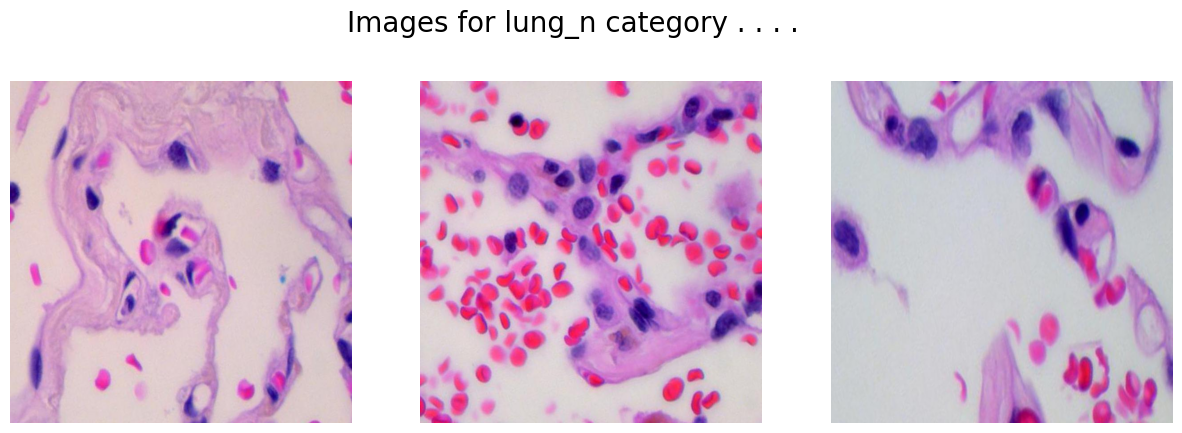

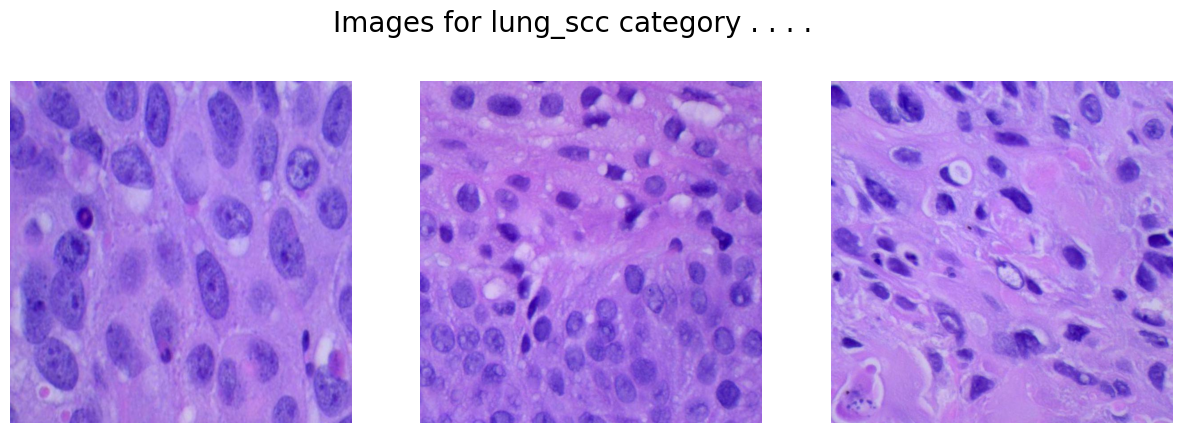

In [9]:
path = r"D:\DATA SETS\archive\lung_colon_image_set\lung_image_sets"

for cat in classes: 
	image_dir = f'{path}/{cat}'
	images = os.listdir(image_dir) 

	fig, ax = plt.subplots(1, 3, figsize = (15, 5)) 
	fig.suptitle(f'Images for {cat} category . . . .', 
				fontsize = 20) 

	for i in range(3): 
		k = np.random.randint(0, len(images)) 
		img = np.array(Image.open(f'{path}/{cat}/{images[k]}')) 
		ax[i].imshow(img) 
		ax[i].axis('off') 
	plt.show()


In [10]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64


In [18]:
X = [] 
Y = [] 
  
for i, cat in enumerate(classes): 
  images = glob(f'{path}/{cat}/*.jpeg') 
  
  for image in images: 
    img = cv2.imread(image) 
      
    X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE))) 
    Y.append(i) 
  
X = np.asarray(X) 
one_hot_encoded_Y = pd.get_dummies(Y).values

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split( 
  X, one_hot_encoded_Y, test_size = SPLIT, random_state = 2022) 
print(X_train.shape, X_val.shape)

(12000, 256, 256, 3) (3000, 256, 256, 3)


In [20]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 
  
pre_trained_model = InceptionV3( 
    input_shape = (IMG_SIZE, IMG_SIZE, 3), 
    weights = 'imagenet', 
    include_top = False
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step


In [21]:
len(pre_trained_model.layers)

311

In [22]:
for layer in pre_trained_model.layers: 
  layer.trainable = False

In [26]:
last_layer = pre_trained_model.get_layer('mixed7') 
print('last layer output shape: ', last_layer.output.shape) 
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [25]:
# Print the summary of the pre-trained model to find the correct layer name
pre_trained_model.summary()


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 127, 127, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 127, 127, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 127, 127, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 125, 125, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 125, 125, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 125, 125, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 125, 125, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 125, 125, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 125, 125, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 62, 62, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 62, 62, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 62, 62, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 62, 62, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 60, 60, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [27]:
x = layers.Flatten()(last_output) 
  
x = layers.Dense(256,activation='relu')(x) 
x = layers.BatchNormalization()(x) 
  
x = layers.Dense(128,activation='relu')(x) 
x = layers.Dropout(0.3)(x) 
x = layers.BatchNormalization()(x) 
  
output = layers.Dense(3, activation='softmax')(x) 
  
model = keras.Model(pre_trained_model.input, output)

In [28]:
model.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'] 
) 

In [36]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau 
  
class myCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs = {}): 
    if logs.get('val_accuracy') > 0.90: 
      print('Validation accuracy has reached upto 90% so, stopping further training') 
      self.model.stop_training = True
  
es = EarlyStopping(patience = 3, 
                   monitor = 'val_accuracy', 
                   restore_best_weights = True) 
  
lr = ReduceLROnPlateau(monitor = 'val_loss', 
                       patience = 2, 
                       factor = 0.5, 
                       verbose = 1)

In [37]:
history = model.fit(X_train, Y_train, 
                    validation_data = (X_val, Y_val), 
                    batch_size = BATCH_SIZE, 
                    epochs = EPOCHS, 
                    verbose = 1, 
                    callbacks = [es, lr, myCallback()])

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 626s 3s/step - accuracy: 0.7991 - loss: 0.5000 - val_accuracy: 0.6497 - val_loss: 1.0660 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 606s 3s/step - accuracy: 0.9118 - loss: 0.2212 - val_accuracy: 0.7963 - val_loss: 0.4648 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 603s 3s/step - accuracy: 0.9265 - loss: 0.1869 - val_accuracy: 0.8517 - val_loss: 0.3895 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 605s 3s/step - accuracy: 0.9394 - loss: 0.1504 - val_accuracy: 0.8023 - val_loss: 0.5934 - learning_rate: 0.0010
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9408 - loss: 0.1554
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 ━━━━━━━━━━━━━━━━━━━━ 597s 3s/step - accuracy: 0.9409 - loss: 0.1552 - val_accuracy: 0.8383 - val_loss: 0.5110 - learning_rate: 0.0010
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9635 - loss: 0.0906V

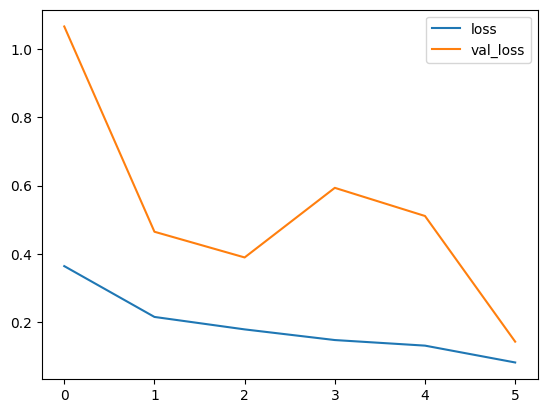

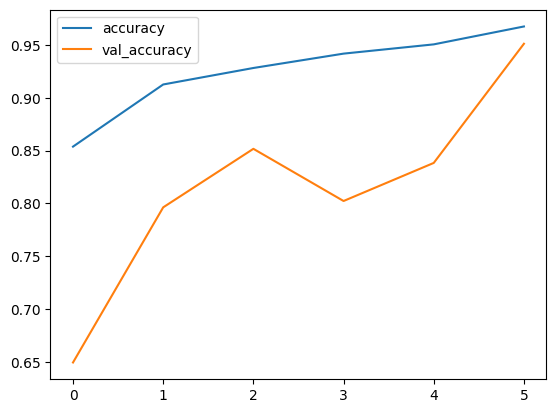

In [38]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:,['loss','val_loss']].plot() 
history_df.loc[:,['accuracy','val_accuracy']].plot() 
plt.show()

In [39]:
Y_pred = model.predict(X_val) 
  
Y_val = np.argmax(Y_val, axis=1) 
Y_pred = np.argmax(Y_pred, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step


In [40]:
metrics.confusion_matrix(Y_val, Y_pred)

array([[907,   6,  74],
       [ 25, 951,   1],
       [ 39,   2, 995]], dtype=int64)

In [41]:
print(metrics.classification_report(Y_val, Y_pred, 
                                    target_names=classes))

              precision    recall  f1-score   support

    lung_aca       0.93      0.92      0.93       987
      lung_n       0.99      0.97      0.98       977
    lung_scc       0.93      0.96      0.94      1036

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

